In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/listings_berlin.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0


In [4]:
df.isnull().sum()

id                                   0
name                                30
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4155
reviews_per_month                 4155
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.491700e+04,1.491700e+04,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000
mean,2.296525e+07,8.290061e+07,52.510261,13.404955,69.795133,8.033787,27.691158,0.719289,2.703493,87.443789
std,1.390651e+07,9.725226e+07,0.031968,0.061559,82.296435,32.318799,53.523007,1.446149,6.409317,123.952458
min,1.944000e+03,1.581000e+03,52.340070,13.097150,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.145042e+07,1.008079e+07,52.489590,13.370510,35.000000,2.000000,2.000000,0.090000,1.000000,0.000000
50%,2.175232e+07,3.972738e+07,52.510040,13.414880,51.000000,3.000000,7.000000,0.270000,1.000000,0.000000
75%,3.502031e+07,1.273090e+08,52.533190,13.438830,80.000000,5.000000,25.000000,0.830000,2.000000,167.000000
max,5.088605e+07,4.096027e+08,52.656110,13.757370,4000.000000,1124.000000,620.000000,94.350000,76.000000,365.000000


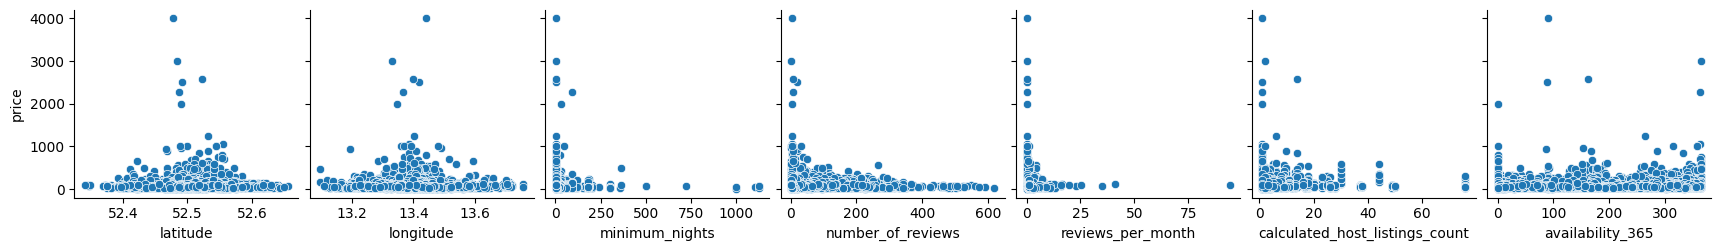

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['latitude',	'longitude',	'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365'], y_vars=['price'], kind="scatter")
plt.show()


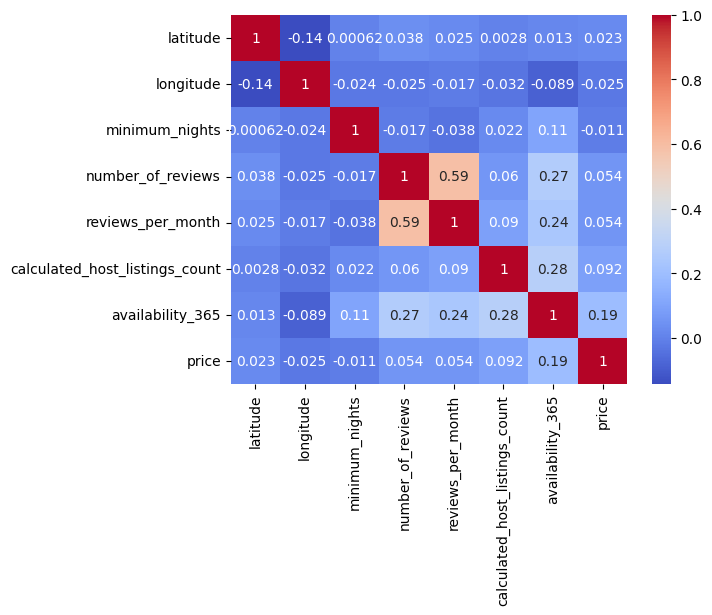

In [8]:
df_numeric = df[['latitude',	'longitude',	'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365', 'price']]
df_numeric_corr = df_numeric.corr()
sns.heatmap(df_numeric_corr, annot=True, cmap='coolwarm')
plt.show()

In [10]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
del df['last_review']
del df['id']
del df['name']
del df['host_id']
del df['host_name']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:,'neighbourhood_group'] = le.fit_transform(df.loc[:,'neighbourhood_group'])
df.loc[:,'neighbourhood'] = le.fit_transform(df.loc[:,'neighbourhood_group'])
df.loc[:,'room_type'] = le.fit_transform(df.loc[:,'room_type'])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4,4,52.54433,13.39761,2,28,60,18,0.21,3,101
1,4,4,52.53305,13.40394,0,74,90,141,2.20,6,357
2,6,6,52.53471,13.41810,0,90,62,147,1.14,1,254
3,10,10,52.49884,13.34940,2,29,7,27,0.28,1,285
4,1,1,52.51163,13.45289,0,79,7,135,1.02,1,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 4292.717296446251
